In [17]:
#RandomForest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
label= pd.read_csv("../train_labels.csv", names=["gender"])
feat=[]


for i in range(631):
    #Read data
    data = pd.read_csv("../train/"+str(i).zfill(3)+".csv", names=['longitude','latitude','azimus','elevation','day/night','esec','JST','days'])
    data_feat= data.drop(columns=['azimus','elevation','day/night','JST','days'])
    #Calculate difference between current row and next row
    data_diff=data_feat.diff()
    distance=0.0
    velocity_temp=[]
    for index, row in data_diff.iterrows():
        #Calculate distance and convert to m
        s=np.sqrt(row["longitude"]**2 + row["latitude"]**2)*111000
        if not pd.isna(s): 
            distance=distance + s
        #Calculate velocity
        velocity_temp.append(s/row["esec"])
    
    #make velocity dataframe
    velocity=pd.DataFrame(velocity_temp)
    velocity_diff=velocity[0].diff()
    #acceleration = velocity.diff()/60

    acc_time=[] #time intveral corresponding to each element of acceleration
    for j in range(len(data_diff["esec"])):
        if j<=1:
            acc_time.append(np.nan)
        else:
            acc_time.append((data_diff["esec"][j-1]+data_diff["esec"][j])/2)    
            
    acceleration=[]
    for j in range(len(velocity_diff)):
        acceleration.append(velocity_diff[j]/acc_time[j])
    acceleration=pd.DataFrame(acceleration)
    
    #Create feature list of current training file
    feat.append([velocity.describe().values[1][0], velocity.describe().values[2][0],velocity.describe().values[7][0], 
         acceleration.describe().values[1][0], acceleration.describe().values[2][0],acceleration.describe().values[7][0], distance, label.iloc[i].values[0]])


In [3]:
data_all=pd.DataFrame(feat)
data_all.columns=["v_mean","v_std","v_max","a_mean","a_std","a_max","distance","gender"]
data_all.drop(["a_mean", "a_max"], inplace=True, axis=1)
data_all

,v_mean,v_std,v_max,a_std,distance,gender
0,3.054401,4.020551,26.629033,0.041051,1.781804e+06,1
1,5.223114,4.943934,27.262247,0.072196,7.085293e+05,1
2,1.715037,2.863629,12.621305,0.029109,9.093783e+04,1
3,3.536605,3.553804,18.146039,0.058511,1.302436e+05,1
4,3.471777,4.358087,26.715153,0.032002,1.514154e+06,1
5,4.614345,4.945196,25.584236,0.051084,3.143818e+06,0
6,3.216767,4.090045,22.364705,0.036199,7.209475e+05,1
7,2.685912,3.956051,13.901073,0.034754,1.475734e+05,0
8,3.101240,3.856106,18.907905,0.037970,9.917349e+05,1
9,5.597627,5.015732,23.082048,0.047882,3.194857e+05,1


In [4]:
X=data_all.drop("gender", axis=1)
y=data_all["gender"]

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[58 37]
 [26 69]]
             precision    recall  f1-score   support

          0       0.69      0.61      0.65        95
          1       0.65      0.73      0.69        95

avg / total       0.67      0.67      0.67       190



Text(0,0.5,'Number')

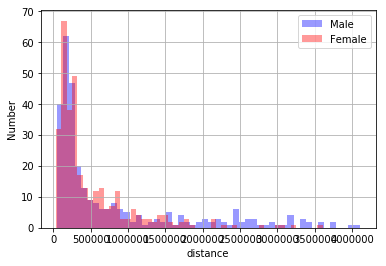

In [8]:
data_all[data_all["gender"]==0]["distance"].hist(alpha=0.4, color="blue", bins=50, label='Male')
data_all[data_all["gender"]==1]["distance"].hist(alpha=0.4, color="red", bins=50, label="Female")
plt.legend()
plt.xlabel('distance')
plt.ylabel('Number')

Text(0,0.5,'Number')

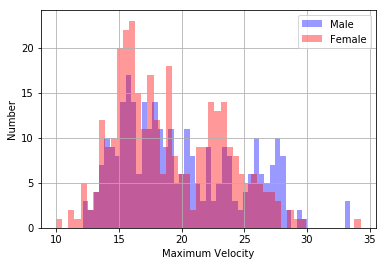

In [9]:
data_all[data_all["gender"]==0]["v_max"].hist(alpha=0.4, color="blue", bins=50, label='Male')
data_all[data_all["gender"]==1]["v_max"].hist(alpha=0.4, color="red", bins=50, label="Female")
plt.legend()
plt.xlabel('Maximum Velocity')
plt.ylabel('Number')

In [11]:
data_all.columns

Index(['v_mean', 'v_std', 'v_max', 'a_std', 'distance', 'gender'], dtype='object')

Text(0,0.5,'Number')

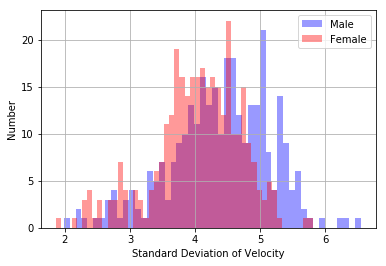

In [15]:
data_all[data_all["gender"]==0]["v_std"].hist(alpha=0.4, color="blue", bins=50, label='Male')
data_all[data_all["gender"]==1]["v_std"].hist(alpha=0.4, color="red", bins=50, label="Female")
plt.legend()
plt.xlabel('Standard Deviation of Velocity')
plt.ylabel('Number')

Text(0,0.5,'Number')

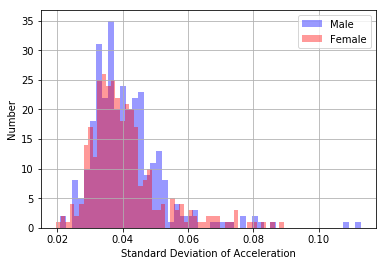

In [16]:
data_all[data_all["gender"]==0]["a_std"].hist(alpha=0.4, color="blue", bins=50, label='Male')
data_all[data_all["gender"]==1]["a_std"].hist(alpha=0.4, color="red", bins=50, label="Female")
plt.legend()
plt.xlabel('Standard Deviation of Acceleration')
plt.ylabel('Number')